<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Инструкция по выполнению проекта
- Загрузите и подготовьте данные. Поясните порядок действий.
- Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.
- Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. - Кратко опишите выводы.
- Проведите финальное тестирование.

Описание данных

Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»). Скачать датасет
Признаки
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак
- Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br> ОК, данные на базе)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
data['Tenure'] = data['Tenure'].fillna(0)
data = data.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>Категорически..... согласен с дропом.<br>
    
По tenure:<br>
решение понятно, но обоснования ему нет, кроме предположения( Почему именно так решили заполнить? как это повлияет на результат моделирования? <br>
<br> Возможно, что групповая (например по географии) медиана также не принесла бы большой ошибки. А может взять и удалить, чтобы не "искушаться"..Тут понятно, что однозначного решения нет, как и алгоритма. Правило только одно (как в медицине) - НЕ нарведи. Т.е. принимаемое решение должно соотноситься с возможным ущербом на конечный результат. В нашем случае ущерб от медианного заполнения ниже от ущерба удалить данные?. Причём выше/ниже - это только на чуйке/жизенном опыте смого аналитика.<br>
Интересная это работа - быть DS-аналитиком)<br><br>
    
В данном случае, спарведливости ради, если построить распределение ДО и ПОСЛЕ заполнения пропусков, то увидим, что оно изменится. Т.е. данный подход несколько исказит инфо, а значит и результат моделирования будет уже не очень.<br> Тут лучшим способом будет - заполнение случайным числом.<br>
    
Ещё вараинт:<br> удалить пропущенные строки. А по окнчании построения модели, вывести важность факторов самой модели. И если фактор tenure окажется не значим, то как в принципе удалить его из моделирования, а первоначально удалённые строки - вернуть.

In [6]:
data = pd.get_dummies(data, drop_first = True) 
#data = data.drop(['Gender_Female'], axis = 1)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br>Есть параметр drop_first=True - он как раз удаляет лишние столбцы. И вот в географии сейчас они остались( Тут такое правило: новых столбцов по категоризируемому фактору должно быть на 1 меньше, чем категорий у фактора. Например, возьмём фактор пол: 0 - это мужчины, а 1 - женщины. У нас один стообец - а описали 2 состояния пола. ОК. Возьмём географию - есть 3 состояния фактора. И тут кодируется так: 2 столбца появились - Германия и Испания. Рассмотрим по строкам: Германия =0, Испания=1 - тут понятно в модели будет работать Испния. Если Германия =1, а Испания=0 - В модели будет работать Германия. А если Германия=Испания=0, то в этотой строке, по умолчанию Франция = 1. Т.е. в модели будет работать Франция. Итого, у нас есть 3 состояния фаткора, значит на достаточно будет только 2-х столбцов. В общем-то это и есть правило: столбцов дамми-переменных на один меньше, чем состояний фатора.

Text(0.5, 1, 'Triangle Correlation Heatmap')

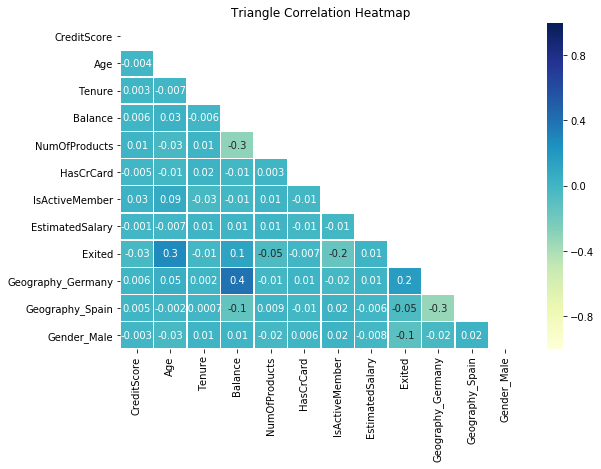

In [7]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool)) 
plt.figure(figsize = (9,6))
heatmap = sns.heatmap(data.corr(), annot = True,fmt = '.1g',linewidth = 0.5, mask=mask, cmap="YlGnBu",vmin=-1, vmax=1 )
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=6)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>
ВАЖНО!!! по использованию корреляций<br>
0) Этот инструмент - исключительно для данных в количественной шкале!!!!<br>
Т.е. Exited и Вораст, например, - корреляцию не посмотреть. Т.к. Одна величина - номинальная (в виде 0 и 1, т.е. да/нет можно сказать), другая количественная. Поэтому для таких ситуаций подойдёт другая техника - сравнение групп (из темы "проверка гипотез" спринт 4).<br><br>
1) Наряду с силой связи, есть ещё характертеристика уровня значимости. Т.е. на сколько выявленной связи можно доверять (это теория р-уровня значений. Ещё будете изучать. Советую (если не очень пока знаете что это) попытать наставника по этому вопросу) <br>

2) Данные имеют склонность быть нормальными и ненормальными (вот ёлки, всё как у людей:)))<br>
Этот факт важен при использовании расчётов коэффициента корреляции:<br>
Если данные нормальные - используют критерий Пирсона. если ненормальный - критерий Спирмена)<br>  
Есть ли последствия от "ложного" использования методов? Да - ложные управленческие выводы!!!!   <br><br>
3) И ещё: корреляция - очень подвержена выбросам!!! Если в данных они есть - вывод буде ложный <br>
4) Так же, очень важно соблюдать однородность выборки.  Если прорустить этот момент, то вывод может быть ложным<br>
5) Возможно, что на разных участках - разная зависимоость. Тут важно, вместе с расчётами выводить график. И вместе всё глядеть.
<br>
    
<font color='green'>
Поэтому к данной матрице я бы пока сдержанно отнёсся)<br>
Вот, например, сслучаи ложной корреляции (вторые три картинки):. "ВЫБРОСЫ": линия (по ней считается корреляция) смещена к отдельной точке, а должна проходить по скоплению точек. Отсюда имеем заниженный к-т корреляции.

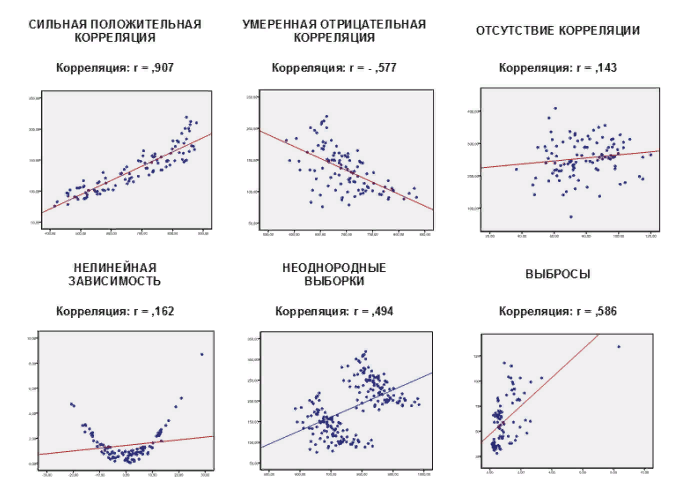

In [8]:
#numeric = ['Balance', 'EstimatedSalary', 'Age', 'Tenure']
#scaler = StandardScaler()
#data[numeric] = scaler.fit_transform(data[numeric]) 
#data

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>Идейно - понятно. И важно, что взяты только количественные данные.<font color='red'> <br>Но есть такой момент: масштабирование лучше проводить на трайн и на тест раздельно. Посмотри этот момент ещё раз, пожалуйста.

In [9]:
features = data.drop(['Exited'], axis = 1)
target = data['Exited']

features_train1, features_valid = train_test_split(features, test_size=0.2, random_state=12345) 
features_train, features_test = train_test_split(features_train1, test_size=0.25, random_state=12345) 

numeric = ['Balance', 'EstimatedSalary', 'Age', 'Tenure']
scaler = StandardScaler()
features_train[numeric] = scaler.fit_transform(features_train[numeric]) 
features_valid[numeric] = scaler.fit_transform(features_valid[numeric]) 
features_test[numeric] = scaler.fit_transform(features_test[numeric]) 
import warnings
warnings.filterwarnings('ignore')

target_train1, target_valid = train_test_split(target, test_size=0.2, random_state=12345) 
target_train, target_test = train_test_split(target_train1, test_size=0.25, random_state=12345)

print(features_train.shape, target_train.shape)
print(features_valid.shape, target_valid.shape)
print(features_test.shape, target_test.shape)


(6000, 11) (6000,)
(2000, 11) (2000,)
(2000, 11) (2000,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>Хорошо, и есть проверка новых выборок. Вот сейчас самое время масштабировать)

**Вывод 1**

- данные загружены 
- заполнены пропуски
- произведено прямое кодирование признака Gender, удалось избежать дамми-ловушку
- произведено масштабирование признаков
- данные разделены на тренировочную, валидационную и тестовую выборку
- по корреляции получается, что: 
 - больше вероятность ухода клиентов из Германии
 - чем старше клиент, тем больше вероятность его ухода
 - более состоятельные клиенты из Германии

## Исследование задачи

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import shuffle


In [11]:
def grid(model, parametrs):
    grid = GridSearchCV(model, parametrs, cv=5)
    grid.fit(features_train, target_train)
    predicted_valid = grid.predict(features_valid)
    print(model)
    print(grid.best_params_, '\n', 'score: ', grid.best_score_.round(4) )
    print('f1 score: ', f1_score(target_valid,predicted_valid).round(4))
    print()
    warnings.filterwarnings('ignore')
grid(DecisionTreeClassifier(random_state = 12345),{ 
              'max_depth': range (1,13, 1),
              } )

grid(RandomForestClassifier(random_state = 12345),{ 
              'n_estimators': range (1, 51, 5),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) } )

grid(LogisticRegression(random_state = 12345), {
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']})

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')
{'max_depth': 6} 
 score:  0.857
f1 score:  0.5112

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
{'max_depth': 9, 'min_samples_leaf': 1, 'min_sa

**Вывод 2**

- с помощью метода grid были получены оптимальные гиперпараметры для дерева, случайного леса и логистической регрессии
- дерево решений и случайный лес показали лучшие результаты по score и f1 score

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>интересное решение)

## Борьба с дисбалансом

In [18]:
def mdl(model):
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print(model, '\n', 'score: ', model.score(features_valid, target_valid).round(4))
    print('f1 score: ', f1_score(target_valid,predicted_valid).round(4))
    print()
    
mdl(LogisticRegression(random_state=12345,solver = 'newton-cg', 
                       class_weight='balanced'))

mdl(DecisionTreeClassifier(random_state=12345, class_weight='balanced',max_depth = 6 
                          ))

mdl(RandomForestClassifier(random_state=12345, class_weight='balanced', 
                          max_depth = 9, n_estimators = 41,min_samples_leaf = 1,
                          min_samples_split = 8))


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False) 
 score:  0.7085
f1 score:  0.5038

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best') 
 score:  0.791
f1 score:  0.5934

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>понятно.

auc_roc:  0.8694


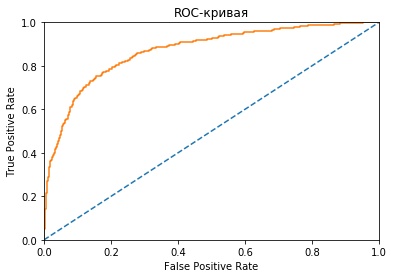

In [19]:
model = RandomForestClassifier(random_state=12345, class_weight='balanced', 
                          max_depth = 9, n_estimators = 41,min_samples_leaf = 1,
                          min_samples_split = 8)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('auc_roc: ', roc_auc_score(target_valid, probabilities_one_valid).round(4))
fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)

def graphic(fpr, tpr):
    plt.figure()
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr)
    plt.xlim([0,1]) 
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    
graphic(fpr, tpr)

**Вывод 3.1**

- путем использования class_weight='balanced' получилось, что наилучший результат показала модель случайного леса
- площадь под roc curve 0.8694, линия выше случайной модели, что говорит о том, что модель достаточно качественная

In [20]:
target_train.value_counts()

0    4781
1    1219
Name: Exited, dtype: int64

1    4876
0    4781
Name: Exited, dtype: int64
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=8, min_weight_fraction_leaf=0.0,
                       n_estimators=41, n_jobs=None, oob_score=False,
                       random_state=12345, verbose=0, warm_start=False) 
 score:  0.827
f1 score:  0.6381 
 recall:  0.7143 
 precision:  0.5766

auc_roc:  0.8685


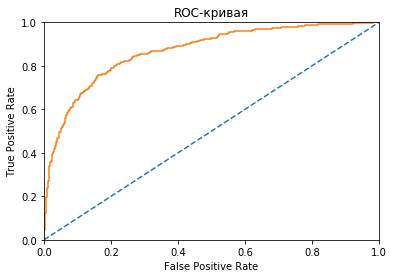

In [21]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

model = RandomForestClassifier(random_state=12345, class_weight='balanced', 
                          max_depth = 9, n_estimators = 41,min_samples_leaf = 1,
                          min_samples_split = 8)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print(model, '\n', 'score: ', model.score(features_valid, target_valid).round(4))
print('f1 score: ', f1_score(target_valid,predicted_valid).round(4), '\n',
     'recall: ', recall_score(target_valid,predicted_valid).round(4), '\n',
     'precision: ', precision_score(target_valid,predicted_valid).round(4))
print()
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('auc_roc: ', roc_auc_score(target_valid, probabilities_one_valid).round(4))
fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
graphic(fpr, tpr)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>ок, балансируем только трайн.

**Вывод 3.2**

- было произведен upsampling, увеличение выборки
- площадь под roc curve 0.8685, линия выше случайной модели, что говорит о том, что модель достаточно качественная
- f1 score = 0.6381

## Тестирование модели

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=8, min_weight_fraction_leaf=0.0,
                       n_estimators=41, n_jobs=None, oob_score=False,
                       random_state=12345, verbose=0, warm_start=False) 
 score:  0.827
f1 score:  0.5871 
 recall:  0.6292 
 precision:  0.5503

auc_roc:  0.8575


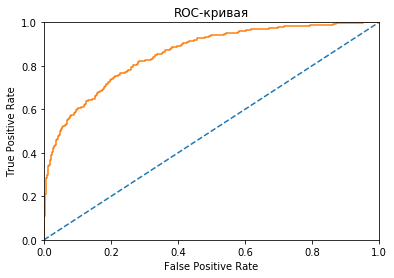

In [22]:
model = RandomForestClassifier(random_state=12345, class_weight='balanced', 
                          max_depth = 9, n_estimators = 41,min_samples_leaf = 1,
                          min_samples_split = 8)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print(model, '\n', 'score: ', model.score(features_test, target_test).round(4))
print('f1 score: ', f1_score(target_test,predicted_test).round(4), '\n',
     'recall: ', recall_score(target_test,predicted_test).round(4), '\n',
     'precision: ', precision_score(target_test,predicted_test).round(4))
print()
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print('auc_roc: ', roc_auc_score(target_test, probabilities_one_test).round(4))
fpr, tpr, thresholds = roc_curve(target_test,probabilities_one_test)


graphic(fpr, tpr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False) 
 score:  0.804
f1 score:  0.573 
 recall:  0.6726 
 precision:  0.4991

auc_roc:  0.8528


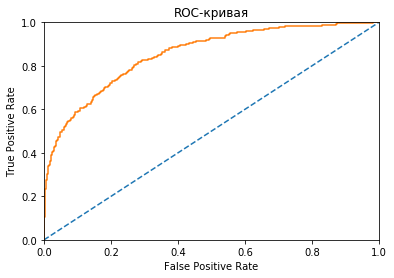

In [23]:
model = RandomForestClassifier(random_state=12345, 
                          max_depth = 9, n_estimators = 41,min_samples_leaf = 1,
                          min_samples_split = 8)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)

print(model, '\n', 'score: ', model.score(features_test, target_test).round(4))
print('f1 score: ', f1_score(target_test,predicted_test).round(4), '\n',
     'recall: ', recall_score(target_test,predicted_test).round(4), '\n',
     'precision: ', precision_score(target_test,predicted_test).round(4))
print()
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print('auc_roc: ', roc_auc_score(target_test, probabilities_one_test).round(4))
fpr, tpr, thresholds = roc_curve(target_test,probabilities_one_test)


graphic(fpr, tpr)

**Вывод 4**

- модель случайного леса с гиперпараметрами 
                          random_state=12345, 
                          max_depth = 9, n_estimators = 41,min_samples_leaf = 1,
                          min_samples_split = 8
                          
                          
      с  class_weight='balanced'  и без него была запущена на тестовой выборке
- более качественная модель получилась c балансировкjq
- f1 = 0.5871, auc roc = 0.8575, что выше случайной модели, это говорит о том, что модель качественная

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
ОК, хорошо. Здесь ещё так можно: параметры модели подобраны на валидационной выборке и уже известны нам. Теперь можгно объединить трайн+валид для обучения и проверять на тесте. А параметры использовать подобранные. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>
<br/> Екатерина, добротная и качественная работа! <br>
Подготовка данных, разносторонняя работа с диссбалансом и исследование моделей и поиск парамтров для них - ничего не забыто <br>
И видно, что проделана рабочая аналитическая работа: результативно и с выводами.<br>  

<font color='green'>
Если говорить, что можно ещё улучшить в подобных проектах, то я бы выделили такие моменты:<br>
1) После подбора параметров модели, когда уже настаёт этап тестировани. Можно обучить на обобщённой выборке (трайн + валидация) ну и тестировать потом. Это может ещё прибавить точности.(если не использовать кросс-валидации)<br>
    
2) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))<br> Очень ВАЖНАЯ для аналитики штука. Ведь нам не просто модель с метрикой нужна, а ещё и причины понять высокой/низкой метрики. Т.е. понять с какой силой сами факторы влияют на целевую.<br>
    
3) Ты используешь матрицу, поэтому просто акцетрирую ещё раз: F1 и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" <br>   

<font color='red'>
Что ещё лучше сделать в этой работе:<br>
1) Есть вопрос по использование ohe-категоризации - посмотри, пожалуйста.<br>
2) масштабирование - лучше делать для выборок раздельно..<br>
<font color='green'>    
    
<br><br>
Спасибо) БУДУ ЖДАТЬ КОММЕНТАРИЕВ!

<font color='purple'>
исправила:<br>
1)  ohe-категоризации <br>
2) масштабирование после разделения на выборки<br>
    
спасибо за советы, очень ценно<br>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u>
<font color='green'><br>Привет, Екатерина!<br>
Увидел доработки. ОК, вроде всё в точку теперь) <br>
СПАСИБО за отклик. рад, то смог помочь подразобраться) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*